In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import blosc

In [11]:
import glob

In [12]:
import re

In [10]:
def get_image_mean(fn):
    with open(fn) as fh:
        d = np.fromstring(blosc.decompress(fh.read()),
                      dtype='uint16')
        return d.mean(dtype='float')

In [8]:
d = np.fromstring(blosc.decompress(open('/home/pmcroot/data4/2016-08-24_121549/2016-08-24_121553_reception_time=1472055353677750_block_id=8_timestamp=336606321864_buffer_id=0_acquisition_start_time=1472055351.6892231_operation_code=0_result_code=0_size=31440896').read()),
                  dtype='uint16')
d.shape = (3232,4864)

In [93]:
files = glob.glob('/home/pmcroot/data*/2016-08-24_121549/*')
files.sort()
del files[593]

In [94]:
files[593]

'/home/pmcroot/data3/2016-08-24_121549/2016-08-24_121616_reception_time=1472055375855794_block_id=102_timestamp=336652526073_buffer_id=0_acquisition_start_time=1472055351.6892231_operation_code=0_result_code=0_size=31440896'

In [88]:
timestamps[592]

336650068403

In [38]:
kv = re.compile("([a-z][a-z_]+=[0-9.]+)+")
def get_info_from_filename(fn):
    info = kv.findall(fn)
    result = {}
    for item in info:
        k,v = item.split('=')
        if '.' in v:
            result[k] = float(v)
        else:
            result[k] = int(v)
    return result

In [39]:
get_info_from_filename(files[0])

{'acquisition_start_time': 1472055351.689223,
 'block_id': 5,
 'buffer_id': 0,
 'operation_code': 0,
 'reception_time': 1472055352969915,
 'result_code': 0,
 'size': 31440896,
 'timestamp': 336604847262}

In [95]:
means = []
acquisition_start_time = 0
block_ids = []
reception_times = []
timestamps = []
for fn in files:
    info = get_info_from_filename(fn)
    acquisition_start_time = info['acquisition_start_time']
    block_ids.append(info['block_id'])
    reception_times.append(info['reception_time'])
    timestamps.append(info['timestamp'])
    means.append(get_image_mean(fn))

In [96]:
means = np.array(means)
block_ids = np.array(block_ids)
reception_times = np.array(reception_times)
timestamps = np.array(timestamps)

In [132]:
order = timestamps.argsort()

In [133]:
means = means[order]
block_ids = block_ids[order]
reception_times = reception_times[order]
timestamps = timestamps[order]

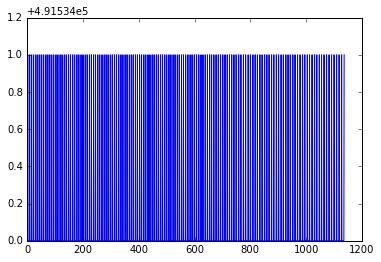

In [194]:
plot(np.diff(timestamps))

In [137]:
np.diff(timestamps).min()

491534

In [ ]:
491534

In [158]:
(491535/2083333.)

0.23593683774989405

In [156]:
40e6/2083333.

19.20000307200049

In [151]:
491535/3./5.

32769.0

In [155]:
(2**15+1)*15

491535

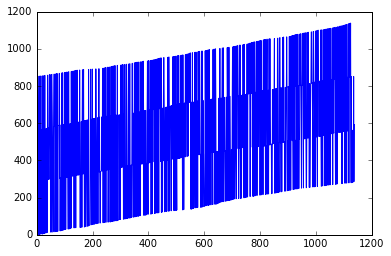

In [43]:
plot(order)

(336602881125, 336622881125.0)

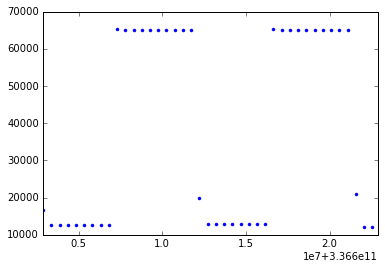

In [98]:
plot(timestamps,means,'.')
xlim(timestamps.min(),timestamps.min()+2e7)

In [166]:
ts2 = timestamps/2083333.33333333

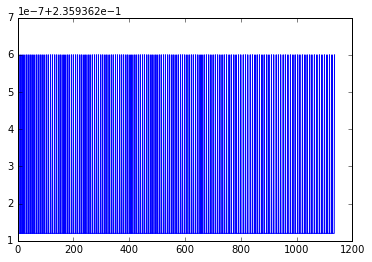

In [167]:
plot(np.diff(ts2))

In [100]:
tslines = open('/home/pmchome/timing-test/timing_test_2016-08-24_121547.txt','r').read().splitlines()

In [101]:
opens = []
closes = []
for line in tslines:
    if line[0] == 'o':
        append_to=opens
    else:
        append_to =closes
    start,end = [float(x) for x in line.split(':')[1].split(',')]
    append_to.append((start,end))
opens = np.array(opens)
closes = np.array(closes)

In [66]:
opens.shape

(60, 2)

(161569.40879110541, 161589.40879110541)

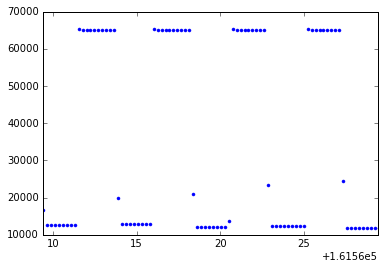

In [71]:
plot(ts2,means,'.')
xlim(ts2.min(),ts2.min()+20)

In [72]:
ts2.min()

161569.40879110541

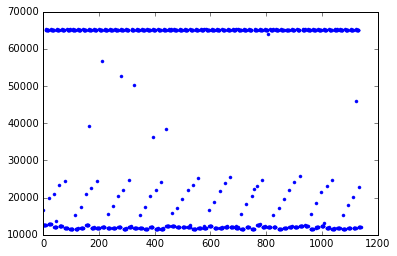

In [102]:
plot(block_ids,means,'.')
#xlim(0,20)

In [81]:
ts2[593]

67244626.220710754

In [126]:
1/4.23845

0.235935306538947

In [131]:
2**23/40e6

0.2097152

In [127]:
2083333.*_

491531.8099777041

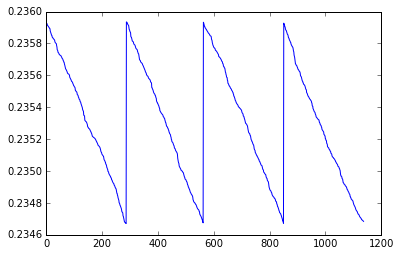

In [125]:
plot(block_ids/4.23845-(ts2-ts2.min()))

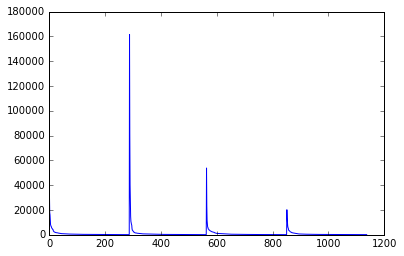

In [104]:
plot(ts2/block_ids.astype('float'))

In [168]:
image_time = ts2-ts2.min() + acquisition_start_time

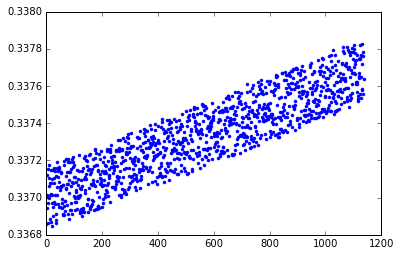

In [169]:
#plot(image_time,means,'.')
plot(reception_times/1e6-image_time,'.')

(1472055609.9488885, 1472055619.9488885)

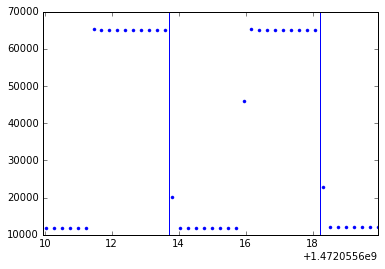

In [173]:
plot(image_time,means,'.')
for ot in closes[:,0]:
    axvline(ot)
xlim(image_time.max()-10,image_time.max())

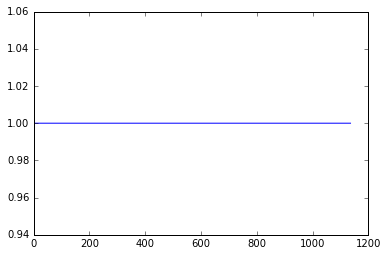

In [174]:
plot(np.diff(block_ids))